# Reading data in python environment

In [1]:
import pandas as pd
data=pd.read_csv('StudentsPerformance.csv')
stud_data=pd.DataFrame(data)
stud_data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1)counting female and male count and its visualization

In [2]:
stud_data['gender'].value_counts().sort_index(ascending=False).sort_values(ascending=False)

female    518
male      482
Name: gender, dtype: int64

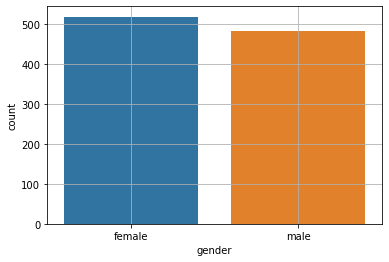

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.countplot(stud_data['gender'])
plt.grid()



# 518 females and 482 males participated in the test

# 2)Students parental level of education pie plot

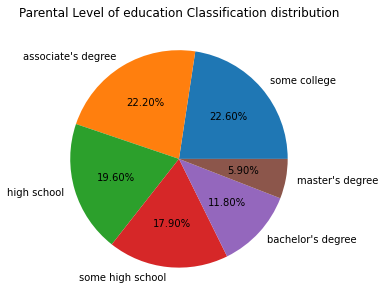

In [4]:
parent_pie =stud_data['parental level of education'].value_counts().rename_axis('Parent_education_Classification').reset_index(name='classification_count')
plt.figure(figsize=(5,5))
plt.pie(parent_pie.classification_count,labels=parent_pie.Parent_education_Classification,autopct = '%.2f%%')
plt.title('Parental Level of education Classification distribution')
plt.show()

# parents withs master's degree is very few and most of them have associate degree or have some college education

# 3.1)slicing data consists of math,reading and writing score based on gender

In [5]:
gender_data=stud_data[['gender','math score','reading score','writing score']]
gender_data.head()

,gender,math score,reading score,writing score
0,female,0,17,10
1,female,8,24,23
2,female,18,32,28
3,female,11,38,32
4,female,22,39,33


# finding the average of 3 scores

In [6]:
avgofthree=(gender_data['math score']+gender_data['reading score']+gender_data['writing score'])/3
gender_data['Average score']=avgofthree
gender_data.head()


,gender,math score,reading score,writing score,Average score
0,female,0,17,10,9.000000
1,female,8,24,23,18.333333
2,female,18,32,28,26.000000
3,female,11,38,32,27.000000
4,female,22,39,33,31.333333


# scatter plot of average score based on gender

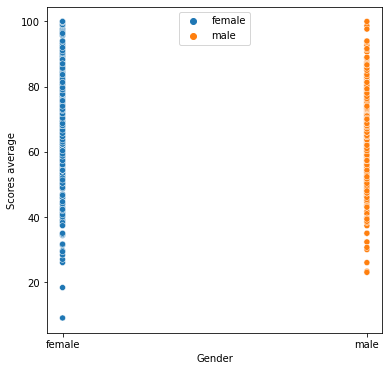

In [7]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=gender_data['gender'],y=gender_data['Average score'],data=gender_data,hue=gender_data['gender'])
plt.xlabel('Gender')
plt.ylabel('Scores average')
plt.legend(loc='upper center')
plt.show()

# conclusion:male students are better in math,reading and writing score

# 3.2 slicing data consists of math,reading and writing score based on test preparation course and finding the average

In [8]:
testp_data=stud_data[['test preparation course','math score','reading score','writing score']]
avgofthrees=(testp_data['math score']+testp_data['reading score']+testp_data['writing score'])/3
testp_data['Average score']=avgofthrees
testp_data.head()

,test preparation course,math score,reading score,writing score,Average score
0,none,0,17,10,9.000000
1,none,8,24,23,18.333333
2,none,18,32,28,26.000000
3,none,11,38,32,27.000000
4,none,22,39,33,31.333333


# scatter plot of average score based on test preparation course

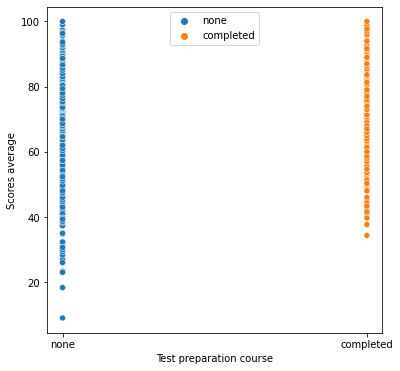

In [9]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=testp_data['test preparation course'],y=testp_data['Average score'],data=testp_data,hue=testp_data['test preparation course'])
plt.xlabel('Test preparation course')
plt.ylabel('Scores average')
plt.legend(loc='upper center')
plt.show()

# conclusion:students who have completed test preparation course are better in maths,reading,writing test scores

# 4.1)Scoring variation of maths,reading and writing based on gender

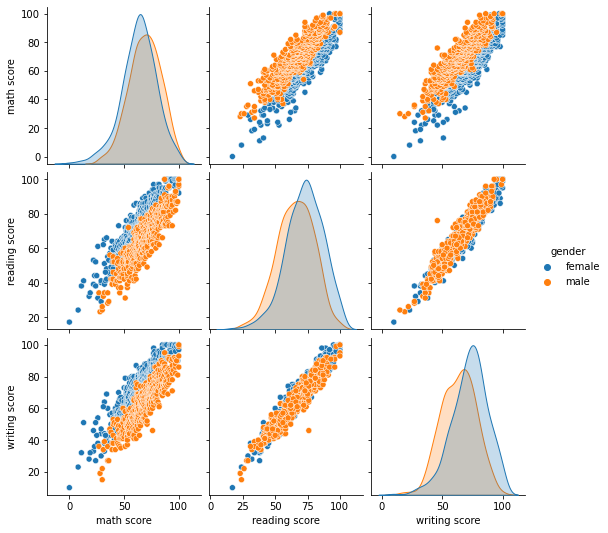

In [10]:
slice_dataa=gender_data[['gender','math score','reading score','writing score']]
sns.pairplot(slice_dataa,hue='gender')

# 4.2)Scoring variation of maths,reading and writing based on test preparation course

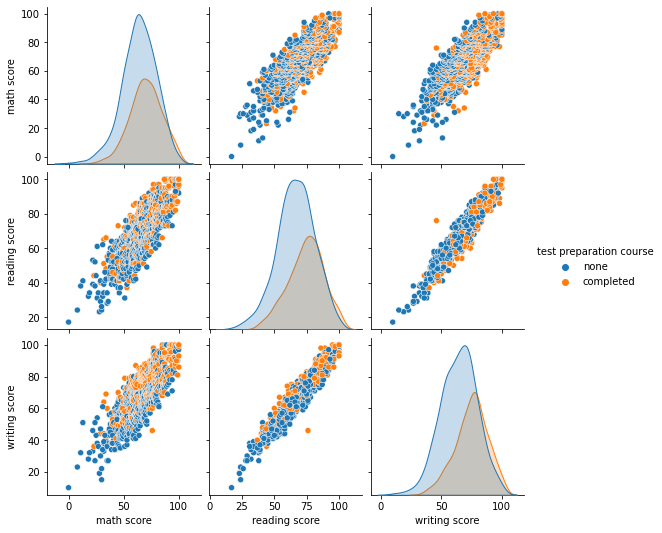

In [11]:
slicep_dataa=testp_data[['test preparation course','math score','reading score','writing score']]
sns.pairplot(slicep_dataa,hue='test preparation course')

# 5)The management needs your help to give bonus points to the top 25% of
#students based on their maths score, so how will you help the management
to achieve this.

# step:1 found out top 25% in maths from 1000 students and filtered parents education classification count

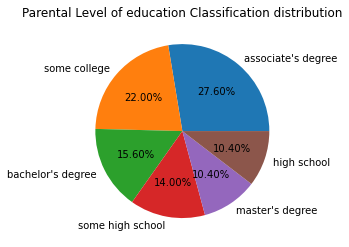

In [15]:
top25=stud_data.nlargest(250,['math score'])
top_pie =top25['parental level of education'].value_counts().rename_axis('Parent_education_Classification').reset_index(name='classification_count')
plt.pie(top_pie.classification_count,labels=top_pie.Parent_education_Classification,autopct = '%.2f%%')
plt.title('Parental Level of education Classification distribution')
plt.show()


# conclusion  most of the parents have either associate degree or have some college education.also10.40% parents have masters degree which is better as compared to whole students data.

# step2: filtering based on lunch status before test from top 25%

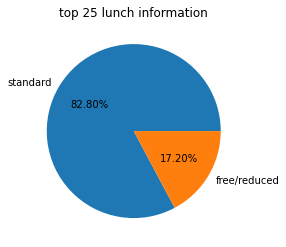

In [16]:
top_pie =top25['lunch'].value_counts().rename_axis('lunch_Classification').reset_index(name='lunch_count')
plt.pie(top_pie.lunch_count,labels=top_pie.lunch_Classification,autopct = '%.2f%%')
plt.title('top 25 lunch information')
plt.show()


# conclusion from maths top 25% ,82% students have taken lunch ,17% havent taken or reduced lunch before test

# step3: filtering based on test preparartion course status before test from maths top 25%

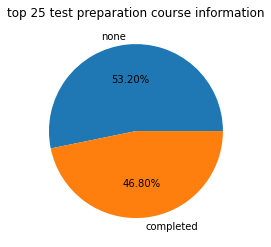

In [17]:
top_pie =top25['test preparation course'].value_counts().rename_axis('test_Classification').reset_index(name='test_count')
plt.pie(top_pie.test_count,labels=top_pie.test_Classification,autopct = '%.2f%%')
plt.title('top 25 test preparation course information')
plt.show()

# from top 25%, 53% have not taken test preparation course and 46% have completed test preparation course

# based on the  above 3 criteria and plots management can take suitable decision for awarding bonus points to maths top 25%